In [1]:
import pandas as pd
df = pd.read_csv("c:/data/pima/data.csv")
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df["outcome"].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [3]:
train_cols = df.columns[0:8]
X = df[train_cols] # 독립변수
y = df["outcome"]

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['outcome'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["outcome"].value_counts()

0    268
1    268
Name: outcome, dtype: int64

In [5]:
X = df_samp[train_cols] # 독립변수
y = df_samp["outcome"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0) #최대 100개 추정
model_ada.fit(X_train, y_train)
print(model_ada.predict(X_test))
print(model_ada.score(X_train, y_train))
print(model_ada.score(X_test, y_test))

[0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1]
0.8761682242990654
0.6944444444444444


In [8]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
%matplotlib inline
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

def plot_tree(model):
    plt.figure(figsize=(10,6))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

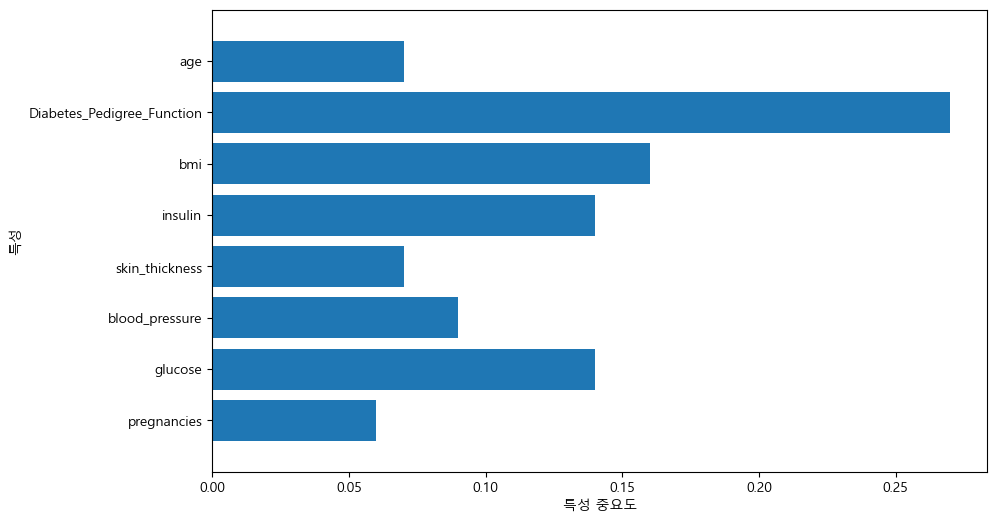

In [9]:
plot_tree(model_ada)

In [18]:
#algorithm : SAMME, SAMME.R(default = 'SAMME.R')
#SAMME.R : SAMME보다 빠르게 수렴되므로 부스팅 반복 횟수가 줄어 테스트 오류가 감소
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
model_svc = AdaBoostClassifier(algorithm='SAMME',n_estimators=50, base_estimator=svc)
model_svc.fit(X_train, y_train)
print(model_svc.predict(X_test))
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test))

[0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.7429906542056075
0.6851851851851852


[0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1]
0.9228971962616822
0.75


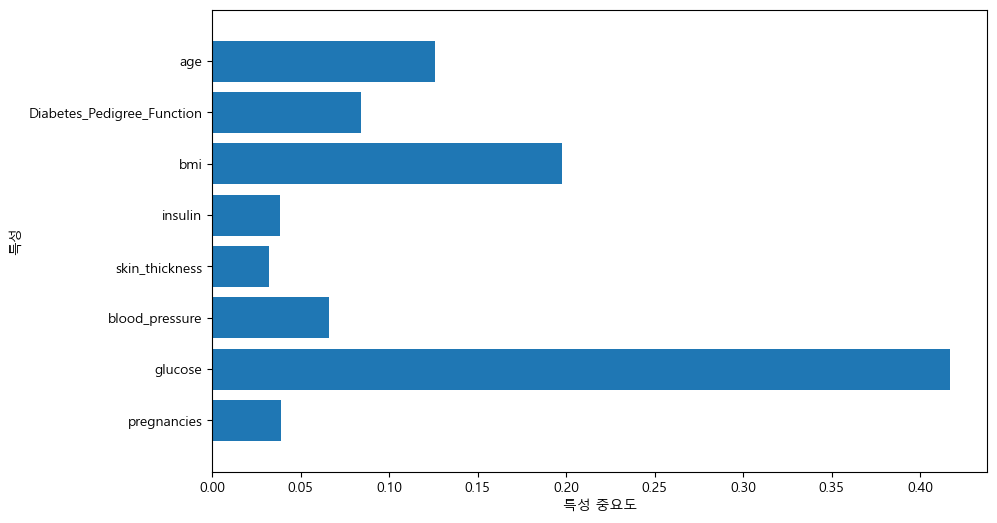

In [11]:
#그레디언트 부스트: 손실을 최소화하는 개별 분류함수를 찾는 알고리즘
# 내부적으로 의사결정 회귀나무 모형을 사용함
from sklearn.ensemble import GradientBoostingClassifier
model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)
model_grad.fit(X_train, y_train)
print(model_grad.predict(X_test))
print(model_grad.score(X_train, y_train))
print(model_grad.score(X_test, y_test))
plot_tree(model_grad)

[0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1]
0.9976635514018691
0.75


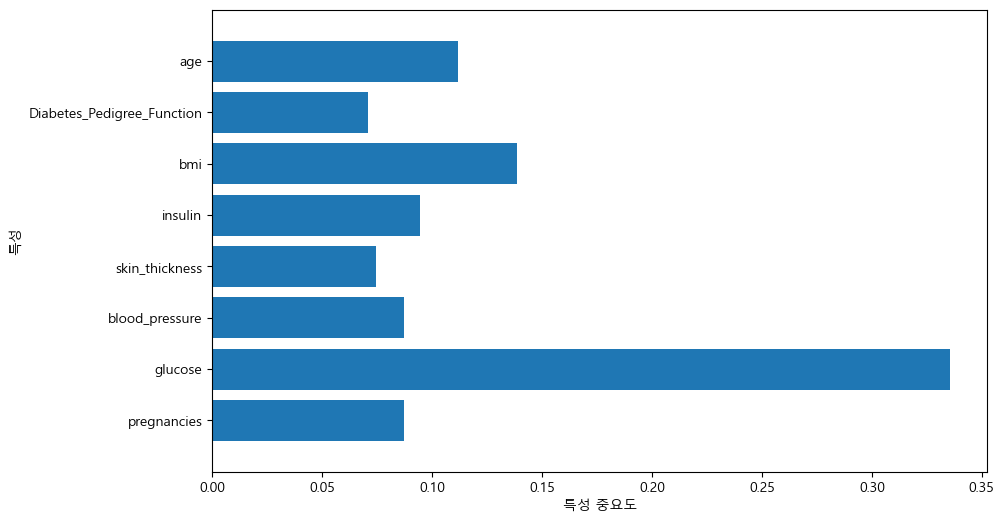

In [19]:
#XGBoost : 그레디언트 부스트 알고리즘을 분산환경에서도 실행할 수 있도록 구현된 라이브러리
# 성능이 우수하고 자원 활용률이 좋아서 최근 많이 사용되고 있는 알고리즘
import xgboost
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=0)
model_xgb.fit(X_train, y_train)
print(model_xgb.predict(X_test))
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test, y_test))
plot_tree(model_xgb)

[0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.8995327102803738
0.7685185185185185


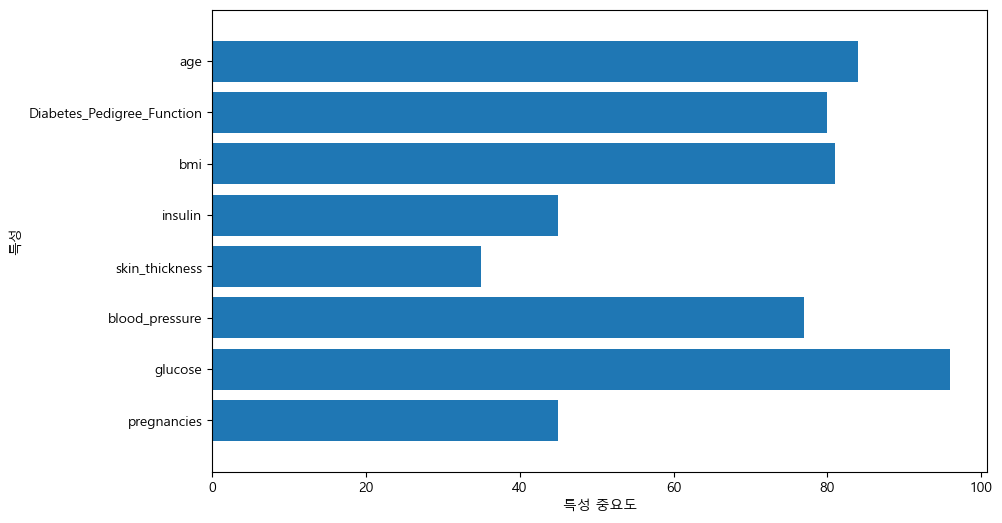

In [17]:
import lightgbm
model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=3, random_state=0)
model_lgbm.fit(X_train, y_train)
print(model_lgbm.predict(X_test))
print(model_lgbm.score(X_train, y_train))
print(model_lgbm.score(X_test, y_test))
plot_tree(model_lgbm)